# SELF CASE STUDY 2 : VISUAL QUESTION ANSWERING

<img src='https://visualqa.org/static/img/main.png'>

## 1.1 PROBLEM STATEMENT

__Visual Question Answering(VQA) is a system that takes an image and natural language question about the image as an input and generates natural language answer as an output.__

VQA is interesting because it requires combining visual and language understanding. A model that solves this task demonstrates a more general understanding of images: it must be able to answer completely different questions about an image, oftentimes even addressing different sections of the image.


<img src = 'https://visualqa.org/static/img/challenge.png' width=600 height=400>

## 1.2 Sources and useful links

Video Description about the problem statement : https://www.youtube.com/watch?v=ElZADFTer4I&t=1345s

Dataset Overview (video) : https://www.youtube.com/watch?v=nMr_sSAMpkE

Dataset source : https://visualqa.org/download.html

Dataset download : https://github.com/GT-Vision-Lab/VQA/blob/master/README.md

BLOG for reference : https://tryolabs.com/blog/2018/03/01/introduction-to-visual-question-answering/

RESEARCH PAPERS :
- VQA: Visual Question Answering : https://arxiv.org/abs/1505.00468
- Hierarchical Question-Image Co-Attention for Visual Question Answering : https://arxiv.org/abs/1606.00061

## 1.3 Dataset overview

### VQA v2.0 release

__This release consists of Real images__

- 82,783 MS COCO training images, 40,504 MS COCO validation images and 81,434 MS COCO testing images (images are obtained from [MS COCO website] (http://mscoco.org/dataset/#download))
- 443,757 questions for training, 214,354 questions for validation and 447,793 questions for testing
- 4,437,570 answers for training and 2,143,540 answers for validation (10 per question)

__There is only one type of task for this dataset:__ **Open-ended visual question answering**

## 1.4 Importing the useful libraries

In [0]:
import warnings
warnings.filterwarnings("ignore")
import json
import os
import re
import argparse

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import pickle
import time as tm
import seaborn as sns
import plotly.express as px
from tqdm import tqdm

## 1.4 Download the dataset (Questions and Annotations)

In [0]:
# Reference : https://github.com/jiasenlu/HieCoAttenVQA/blob/master/data/vqa_preprocess.py
# NOTE : 
    # The python version used in the repo is 2.0 and I am using python-3.7. 
    # So I have to make some code changes
# Download the VQA Questions from http://www.visualqa.org/download.html
# NOTE : The links are updated. The links in the given file (by the website) are expired

def download_vqa():
    
    print('Download started....')
    
    ########## Download the VQA questions ##########
    
    # Checking if the directory contains the file
    if os.path.isfile('data/v2_Questions_Train_mscoco.zip'):
        print('File already downloaded.... Skipping.....')
    else:
        os.system('wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Train_mscoco.zip -P data/')
        print('Train Questions downloaded...')
        
    # Checking if the directory contains the file
    if os.path.isfile('data/v2_Questions_Val_mscoco.zip'):
        print('File already downloaded.... Skipping.....')
    else:
        os.system('wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Val_mscoco.zip -P data/')
        print('Validation Questions downloaded...')
        
    # Checking if the directory contains the file
    if os.path.isfile('data/v2_Questions_Test_mscoco.zip'):
        print('File already downloaded.... Skipping.....')
    else:
        os.system('wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Test_mscoco.zip -P data/')
        print('Test Questions downloaded...')
    
    
    ########## Download the VQA Annotations ##########
    
    # Checking if the directory contains the file
    if os.path.isfile('data/v2_Annotations_Train_mscoco.zip'):
        print('File already downloaded.... Skipping.....')
    else:
        os.system('wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Train_mscoco.zip -P data/')
        print('Train Annotations downloaded...')
    
    # Checking if the directory contains the file
    if os.path.isfile('data/v2_Annotations_Val_mscoco.zip'):
        print('File already downloaded.... Skipping.....')
    else:
        os.system('wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Val_mscoco.zip -P data/')
        print('Validation Annotations downloaded...')
        
    
    # Unzip the annotations
    print('Unzipping the datasets...')
    os.system('unzip data/v2_Questions_Train_mscoco.zip -d annotations/')
    os.system('unzip data/v2_Questions_Val_mscoco.zip -d annotations/')
    os.system('unzip data/v2_Questions_Test_mscoco.zip -d annotations/')
    os.system('unzip data/v2_Annotations_Train_mscoco.zip -d annotations/')
    os.system('unzip data/v2_Annotations_Val_mscoco.zip -d annotations/')
    print("..DONE..")

In [0]:
## Downloading the dataset
download_vqa()

Download started....
File already downloaded.... Skipping.....
File already downloaded.... Skipping.....
File already downloaded.... Skipping.....
File already downloaded.... Skipping.....
File already downloaded.... Skipping.....
Unzipping the datasets...
..DONE..


## 2.1 Loading the downloaded train_annotations and train_questions json files

In [0]:
# Loading the annotations
train_anno = json.load(open('annotations/v2_mscoco_train2014_annotations.json', 'r'))

# Loading the Questions
train_ques = json.load(open('annotations/v2_OpenEnded_mscoco_train2014_questions.json', 'r'))

In [0]:
train_anno

{'info': {'description': 'This is v2.0 of the VQA dataset.',
  'url': 'http://visualqa.org',
  'version': '2.0',
  'year': 2017,
  'contributor': 'VQA Team',
  'date_created': '2017-04-26 17:07:13'},
 'license': {'url': 'http://creativecommons.org/licenses/by/4.0/',
  'name': 'Creative Commons Attribution 4.0 International License'},
 'data_subtype': 'train2014',
 'annotations': [{'question_type': 'what is this',
   'multiple_choice_answer': 'net',
   'answers': [{'answer': 'net', 'answer_confidence': 'maybe', 'answer_id': 1},
    {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 2},
    {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 3},
    {'answer': 'netting', 'answer_confidence': 'yes', 'answer_id': 4},
    {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 5},
    {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 6},
    {'answer': 'mesh', 'answer_confidence': 'maybe', 'answer_id': 7},
    {'answer': 'net', 'answer_confidence': 'yes', 'answer_

In [0]:
train_ques

{'info': {'description': 'This is v2.0 of the VQA dataset.',
  'url': 'http://visualqa.org',
  'version': '2.0',
  'year': 2017,
  'contributor': 'VQA Team',
  'date_created': '2017-04-26 17:07:13'},
 'task_type': 'Open-Ended',
 'data_type': 'mscoco',
 'license': {'url': 'http://creativecommons.org/licenses/by/4.0/',
  'name': 'Creative Commons Attribution 4.0 International License'},
 'data_subtype': 'train2014',
 'questions': [{'image_id': 458752,
   'question': 'What is this photo taken looking through?',
   'question_id': 458752000},
  {'image_id': 458752,
   'question': 'What position is this man playing?',
   'question_id': 458752001},
  {'image_id': 458752,
   'question': 'What color is the players shirt?',
   'question_id': 458752002},
  {'image_id': 458752,
   'question': 'Is this man a professional baseball player?',
   'question_id': 458752003},
  {'image_id': 262146,
   'question': 'What color is the snow?',
   'question_id': 262146000},
  {'image_id': 262146,
   'question'

## NOTE:
1. As we can see that the file contains some metadata about the dataset and along with that annotations and questions for the respective images.
2. We will just pick the `annotations` key from the `train_anno` and `questions` key from the `train_ques`

## 2.2 Creating new dataframes of Annotations and Questions 

In [0]:
# Dataframe for annotations
train_anno_df = pd.DataFrame(train_anno['annotations'])
del train_anno

# Dataframe for questions
train_ques_df = pd.DataFrame(train_ques['questions'])
del train_ques

print("Number of Annotations : ", train_anno_df.shape)
print("Number of Questions : ", train_ques_df.shape)

Number of Annotations :  (443757, 6)
Number of Questions :  (443757, 3)


In [0]:
train_anno_df.head()

answer_type                                            answers  image_id  \
0       other  [{'answer': 'net', 'answer_confidence': 'maybe...    458752   
1       other  [{'answer': 'pitcher', 'answer_confidence': 'y...    458752   
2       other  [{'answer': 'orange', 'answer_confidence': 'ye...    458752   
3      yes/no  [{'answer': 'yes', 'answer_confidence': 'yes',...    458752   
4       other  [{'answer': 'white', 'answer_confidence': 'yes...    262146   

  multiple_choice_answer  question_id      question_type  
0                    net    458752000       what is this  
1                pitcher    458752001               what  
2                 orange    458752002  what color is the  
3                    yes    458752003            is this  
4                  white    262146000  what color is the

### 2.2.1 Expanding the answers column

In [0]:
pd.DataFrame(train_anno_df['answers'][0])

answer answer_confidence  answer_id
0      net             maybe          1
1      net               yes          2
2      net               yes          3
3  netting               yes          4
4      net               yes          5
5      net               yes          6
6     mesh             maybe          7
7      net               yes          8
8      net               yes          9
9      net               yes         10

In [0]:
train_ques_df.head()

image_id                                     question  question_id
0    458752    What is this photo taken looking through?    458752000
1    458752           What position is this man playing?    458752001
2    458752             What color is the players shirt?    458752002
3    458752  Is this man a professional baseball player?    458752003
4    262146                      What color is the snow?    262146000

In [0]:
train_anno_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443757 entries, 0 to 443756
Data columns (total 6 columns):
answer_type               443757 non-null object
answers                   443757 non-null object
image_id                  443757 non-null int64
multiple_choice_answer    443757 non-null object
question_id               443757 non-null int64
question_type             443757 non-null object
dtypes: int64(2), object(4)
memory usage: 20.3+ MB


In [0]:
train_ques_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443757 entries, 0 to 443756
Data columns (total 3 columns):
image_id       443757 non-null int64
question       443757 non-null object
question_id    443757 non-null int64
dtypes: int64(2), object(1)
memory usage: 10.2+ MB


## NOTE:
1. There are no null vales in the dataset.
2. The annotations file contains 6 columns. 
    - `['answer_type', 'answers', 'image_id', 'multiple_choice_answer', 'question_id', 'question_type']`
3. The questions file contains 3 columns.
    - `['image_id', 'question', 'question_id']`
4. For every question there are 10 answers with an answer_confidence. Averaging the answer confidence the final answer has been decided as the multiple_choice_answer column.

## 2.3 Creating the train and test splits

### NOTE:
1. We will keep the following columns for data analysis and after the data analysis we will remove these columns
    * `['answer_type', 'image_id', 'multiple_choice_answer', 'question_id', 'question_type', 'question']`

In [0]:
def split_dataset(split=0):
    
    '''
    Put the VQA data into single json file, 
    where [[Question_id, Image_id, Question, multipleChoice_answer, Answer] ... ]
    '''

    train = []
    test = []
    imdir = 'images/%s/COCO_%s_%012d.jpg'

    if split == 1:

        print('Loading annotations and questions...')
        
        # Loading the annotations
        train_anno = json.load(open('annotations/v2_mscoco_train2014_annotations.json', 'r'))
        val_anno = json.load(open('annotations/v2_mscoco_val2014_annotations.json', 'r'))

        # Loading the Questions
        train_ques = json.load(open('annotations/v2_OpenEnded_mscoco_train2014_questions.json', 'r'))
        val_ques = json.load(open('annotations/v2_OpenEnded_mscoco_val2014_questions.json', 'r'))

        # Creating a list containing the question_id, image_path, question, ans, ans_type, ques_type
        subtype = 'train2014'
        for i in tqdm(range(len(train_anno['annotations']))):
            
            ans = train_anno['annotations'][i]['multiple_choice_answer']
            question_id = train_anno['annotations'][i]['question_id']
            image_path = imdir%(subtype, subtype, train_anno['annotations'][i]['image_id'])
            question = train_ques['questions'][i]['question']
            question_type = train_anno['annotations'][i]['question_type']
            ans_type = train_anno['annotations'][i]['answer_type']

            train.append({'ques_id': question_id, 
                          'img_path': image_path, 
                          'question': question, 
                          'ans': ans,
                          'ans_type': ans_type, 
                          'ques_type': question_type})
        
        # Creating a list containing the question_id, image_path, question, ans,  ans_type, ques_type
        subtype = 'val2014'
        for i in tqdm(range(len(val_anno['annotations']))):
            ans = val_anno['annotations'][i]['multiple_choice_answer']
            question_id = val_anno['annotations'][i]['question_id']
            image_path = imdir%(subtype, subtype, val_anno['annotations'][i]['image_id'])
            question = val_ques['questions'][i]['question']
            question_type = train_anno['annotations'][i]['question_type']
            ans_type = train_anno['annotations'][i]['answer_type']

            test.append({'ques_id': question_id, 
                          'img_path': image_path, 
                          'question': question, 
                          'ans': ans,
                          'ans_type': ans_type, 
                          'ques_type': question_type})
            
            
    print('Training samples : {}, Testing sample : {}'.format(len(train), len(test)))

    json.dump(train, open('data/vqa_raw_train.json', 'w'))
    json.dump(test, open('data/vqa_raw_test.json', 'w'))

    
## Splitting the dataset into train and test
split_dataset(split=1)

Loading annotations and questions...


100%|██████████| 214354/214354 [00:00<00:00, 336403.21it/s]


Training samples : 443757, Testing sample : 214354


<h2><font color='blue'>*****************************************************************************************************</font></h2>

# 3. Performing EDA on the data

### 3.1 Loading the data

In [0]:
# Loading the train data 
vqa_train_df = pd.DataFrame(json.load(open('data/vqa_raw_train.json', 'r')))
vqa_train_df.head()

ans ans_type                                          img_path  \
0      net    other  images/train2014/COCO_train2014_000000458752.jpg   
1  pitcher    other  images/train2014/COCO_train2014_000000458752.jpg   
2   orange    other  images/train2014/COCO_train2014_000000458752.jpg   
3      yes   yes/no  images/train2014/COCO_train2014_000000458752.jpg   
4    white    other  images/train2014/COCO_train2014_000000262146.jpg   

     ques_id          ques_type                                     question  
0  458752000       what is this    What is this photo taken looking through?  
1  458752001               what           What position is this man playing?  
2  458752002  what color is the             What color is the players shirt?  
3  458752003            is this  Is this man a professional baseball player?  
4  262146000  what color is the                      What color is the snow?

In [0]:
print("Number of datapoints the dataset :          ", len(vqa_train_df))
print("Number of unique question id :              ", len(vqa_train_df['ques_id'].unique()))
print("Number of unique question types :           ", len(vqa_train_df['ques_type'].unique()))
print("Number of unique questions in the dataset : ", len(vqa_train_df['question'].unique()))
print("Number of unique answers types :            ", len(vqa_train_df['ans_type'].unique()))
print("Number of unique answers :                  ", len(vqa_train_df['ans'].unique()))
print("Number of unique images :                   ", len(vqa_train_df['img_path'].unique()))

Number of datapoints the dataset :           443757
Number of unique question id :               443757
Number of unique question types :            65
Number of unique questions in the dataset :  152050
Number of unique answers types :             3
Number of unique answers :                   22531
Number of unique images :                    82783


### 3.2 Testing for any NULL columns

In [0]:
vqa_train_df[vqa_train_df.isnull().any(axis=1)]

Empty DataFrame
Columns: [ans, ans_type, img_path, ques_id, ques_type, question]
Index: []

## NOTE:
__There are no null values in the dataset__

<h2><font color='blue'>*****************************************************************************************************</font></h2>

# [X] Univariate analysis for `question` and `answer` in the dataset

### 3.3 Preprocessing the question column

In [0]:
# %%time
# # Note:
# # This block takes a lot of time to run. So skipping it for now.....

# # Function for preprocessing the questions
# def nlp_preprocessing(total_text, index, column):
    
#     if type(total_text) is not int:
#         # replace every special char with space
#         total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
#         # replace multiple spaces with single space
#         total_text = re.sub('\s+',' ', total_text)
#         # converting all the chars into lower-case.
#         total_text = total_text.lower()
            
#     vqa_train_df[column][index] = total_text
    
# # Text processing stage.
# for index, qtn in tqdm(vqa_train_df.iterrows()):
#     if type(qtn['question']) is str:
#         nlp_preprocessing(qtn['question'], index, 'question')
#     else:
#         print("there is no text description for id:",index)

### 3.4 Testing for duplicate questions

In [0]:
vqa_train_df['question'].duplicated().value_counts()

True     291707
False    152050
Name: question, dtype: int64

### 3.4.1 Plotting the distribution of duplicate and non duplicate questions

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2f8791a20>],
      dtype=object)

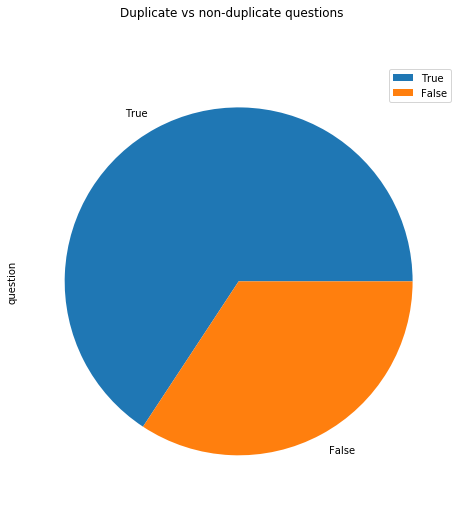

In [0]:
fig, ax = plt.subplots(figsize=(8,8))
pd.DataFrame(vqa_train_df['question'].duplicated().value_counts()).plot(kind='pie', 
                                                                        subplots=True, 
                                                                        ax=ax, 
                                                                        title='Duplicate vs non-duplicate questions')

## NOTE :
1. Out of 443757 training examples, 291707 contains duplicate questions.
2. Most of the questions are repeated for some different images because there are 82,783 images in the training dataset and for each image there are multiple questions.
3. This means there are similar types of images as well to which the same questions are being asked. This is why we get so many repeated questions.

<img src='https://visualqa.org/static/img/vqa_examples.jpg' width="600" height="400">

### 3.4.2 Let's see how many questions are there per question type

In [0]:
# Creating a dataframe with counts of unique question_ids 
# This will give us an idea about how many questions are repeating as per the question type 
# and what kind of questions are categorized under which question type

pd.DataFrame(vqa_train_df.groupby(['ques_type','question'])['question'].count())

question
ques_type  question                                                    
are        Are  this colored roses?                                   2
           Are  this man's friends  invited to the party?             2
           Are 2 animals standing in a field?                         2
           Are 2 or more people more than likely going on ...         2
           Are Arabic words on the truck?                             2
           Are Chinese beers popular?                                 1
           Are Gunning and Gundaroo the same direction?               1
           Are How many trees in the photo?                           2
           Are Is this luggage scuffed up?                            2
           Are U-turns allowed at this light?                         1
           Are a lot of people flying kites in the same ar...         2
           Are a lot of people waiting to get on?                     2
           Are adults or children playing?                            2
           Are aircrafts essential to human migration?                1
           Are alien lizard people living under the sand?             1
           Are all 3 men wearing the same color?                      1
           Are all 3 of the animals in these pictures the ...         2
           Are all 3 of these images of the same surfer?              1
           Are all 4 wheels on the ground?                            2
           Are all 4 wheels the same color?                           2
           Are all animals of the same breed?                         2
           Are all arrows green?                                      2
           Are all birds facing the same direction?                   1
           Are all buses double-deckers?                              2
           Are all cars clearly in focus?                             2
           Are all cars going in the same direction?                  2
           Are all cats of the same breed?                            2
           Are all cattle facing the camera?                          2
           Are all chairs alike?                                      2
           Are all clocks showing the same time?                      2
...                                                                 ...
why is the Why is the woman using an umbrella?                        2
           Why is the woman using the umbrella?                       2
           Why is the woman walking in front of the vehicles?         2
           Why is the woman wearing a bracelet?                       1
           Why is the woman wearing a coat?                           2
           Why is the woman wearing a crown?                          1
           Why is the woman wearing a helmet?                         4
           Why is the woman wearing a scarf?                          1
           Why is the woman wearing a veil?                           2
           Why is the woman wearing black clothes?                    1
           Why is the woman wearing boots?                            2
           Why is the woman wearing gloves?                           2
           Why is the woman wiping her face?                          1
           Why is the woman's face covered?                           2
           Why is the woman's hand in the air?                        1
           Why is the woman's head blurry?                            2
           Why is the women sitting in the fridge?                    1
           Why is the word bus upside down?                           1
           Why is the wrap red?                                       1
           Why is the writing upside down?                            2
           Why is the yellow sauce placed on the side of t...         2
           Why is the yellow stripe in the road?                      1
           Why is the young man hang in mid air?                      1
           Why is the young man

### 3.4.3 Plotting the frequencies of the repeating questions

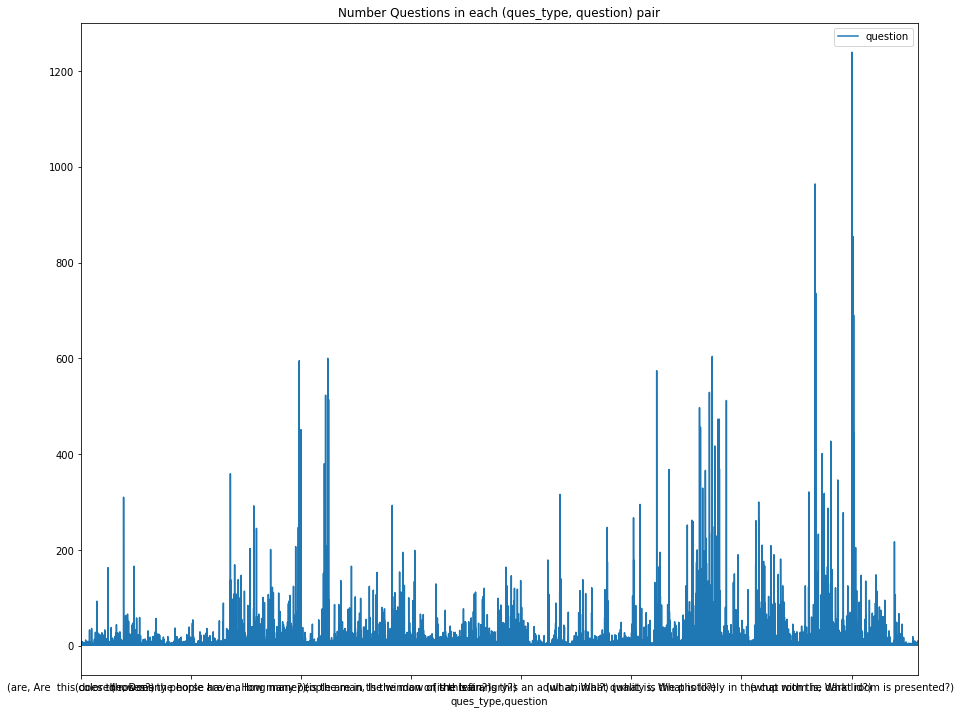

In [0]:
# In the block the frequencies of the pair of (question_type , question_id) is plotted.
# This means we can see what is the frequency of each of the pair of the (question_type , question_id) 
# i.e how many times that question is repeated.

fig, ax = plt.subplots(figsize=(15,12))
pd.DataFrame(vqa_train_df.groupby(['ques_type','question'])['question'].count()).plot(kind='line', 
                                                                                     ax=ax, 
                                                                                     title='Number Questions in each (ques_type, question) pair')

## NOTE:
1. Since it is difficult to inference anything from this graph so we will use other techniques to inference a little more 

### 3.4.4 Taking the sum of all the question in that specific question_type

In [0]:
# This gives the total number of questions per question type.
# There are total 56 question types and summing the count for each question type gives us an estimate 
# of the frequency of each question type. (Number of questions in each question type)

pd.DataFrame(vqa_train_df.groupby('question')['ques_type'].value_counts().unstack().sum())

0
ques_type                        
are                        4912.0
are the                   10701.0
are there                  5877.0
are there any              2790.0
are these                  5782.0
are they                   3074.0
can you                    1728.0
could                      1698.0
do                         3012.0
do you                     1971.0
does the                   6103.0
does this                  4396.0
has                        1827.0
how                        4740.0
how many                  42339.0
how many people are        4276.0
how many people are in     2071.0
is                         6079.0
is he                      2534.0
is it                      7345.0
is that a                  1585.0
is the                    34927.0
is the man                 4972.0
is the person              1694.0
is the woman               1938.0
is there                   6513.0
is there a                 9982.0
is this                   16444.0
is this a                 16024.0
is this an                 1981.0
...                           ...
what are                   3277.0
what are the               7225.0
what brand                 1600.0
what color                 3032.0
what color are the         6183.0
what color is              2649.0
what color is the         27962.0
what does the              4075.0
what is                   13561.0
what is in the             3990.0
what is on the             4254.0
what is the               24502.0
what is the color of the   1750.0
what is the man            5238.0
what is the name           1618.0
what is the person         1729.0
what is the woman          1706.0
what is this               3970.0
what kind of              11192.0
what number is             1668.0
what room is               1647.0
what sport is              2527.0
what time                  2914.0
what type of               7962.0
where are the              2161.0
where is the               6734.0
which                      5382.0
who is                     2154.0
why                        3347.0
why is the                 1544.0

[65 rows x 1 columns]

## NOTE:
1. We have total 65 question_types and we have the count of all the questions in individual question type.
2. Let's see how they are distributed and which question type has the most number of questions.

### 3.4.5 Pie chart of questions type distribution for each questions

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe380ef7940>],
      dtype=object)

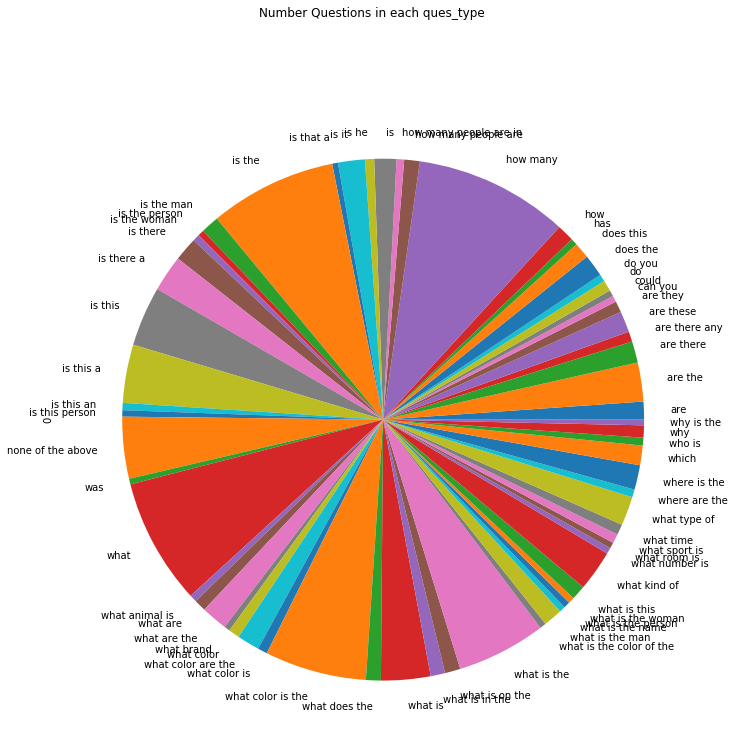

In [0]:
# plot data
fig, ax = plt.subplots(figsize=(12,12))
pd.DataFrame(vqa_train_df.groupby('question')['ques_type'].value_counts().unstack().sum()).plot(kind='pie', 
                                                                                                ax=ax, 
                                                                                                subplots=True, 
                                                                                                legend=False, 
                                                                                                title='Number Questions in each ques_type')

### 3.4.6 Counting the repeating questions

In [0]:
# Counts of the individual questions
# This gives us an idea about how many times this question has been asked. 
# Just for demo I am taking only 100 questions
vqa_train_df['question'].value_counts()[0:50,]

What room is this?                     1239
What is the man doing?                  964
What sport is this?                     854
What is the man holding?                736
What time is it?                        690
What color is the plate?                604
Is it raining?                          600
How many people are there?              595
What animal is this?                    574
What color is the man's shirt?          529
Is it daytime?                          523
Is it sunny?                            514
What does the sign say?                 512
What sport is being played?             505
What color is the bus?                  497
What color is the train?                473
What color is the wall?                 473
What color is the cat?                  456
How many people are in the picture?     451
What time of day is it?                 445
What kind of animal is this?            427
What color is the sky?                  417
What is the person doing?       

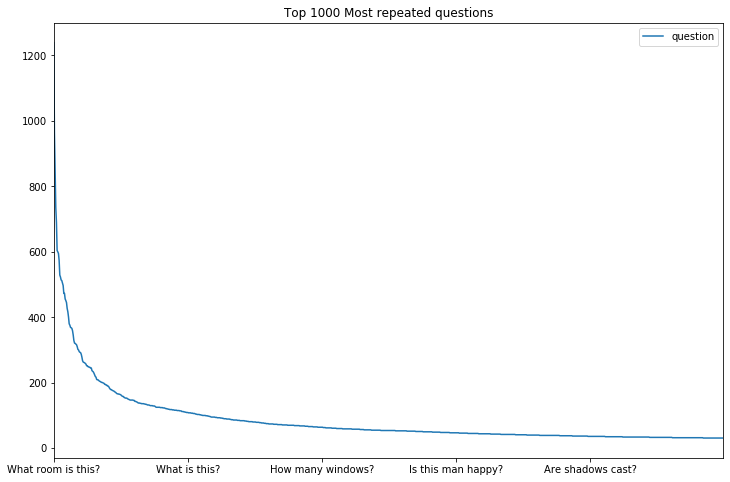

In [0]:
# Taking only the top 1000 most repeated question

fig, ax = plt.subplots(figsize=(12,8))
pd.DataFrame(vqa_train_df['question'].value_counts()[0:1000,]).plot(kind='line', 
                                                                    ax=ax, 
                                                                    legend=True,
                                                                    title='Top 1000 Most repeated questions')

### 3.4.7 Plotting the top 50 most repeating questions

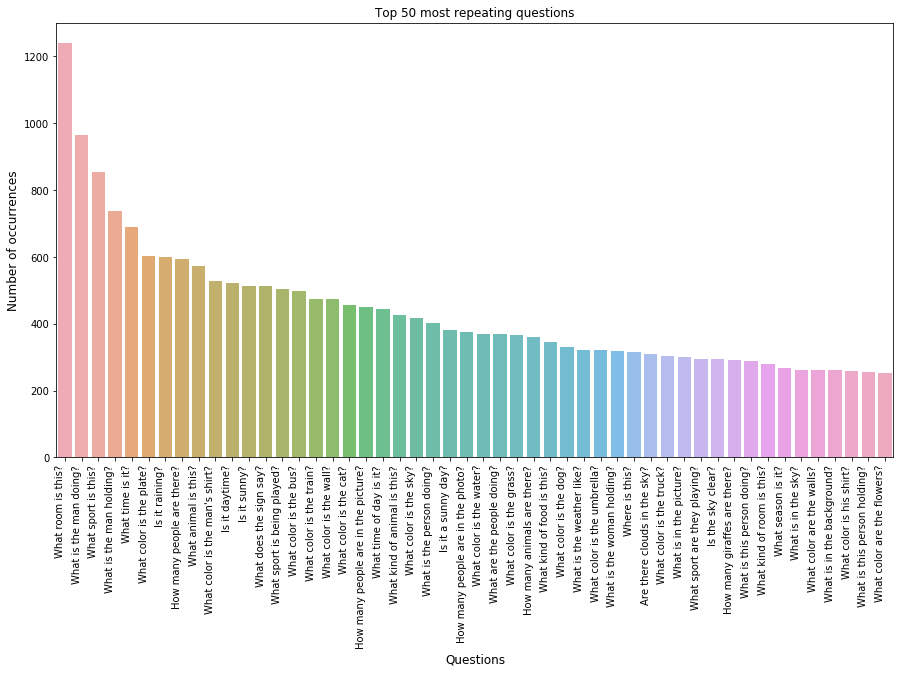

In [0]:
qtn_count = vqa_train_df['question'].value_counts()[:50,]

plt.figure(figsize=(15,8))
sns.barplot(qtn_count.index, qtn_count.values, alpha=0.8)
plt.xticks(rotation=90, horizontalalignment='right')
plt.title('Top 50 most repeating questions')
plt.ylabel('Number of occurrences', fontsize=12)
plt.xlabel('Questions', fontsize=12)
plt.show()

### 3.5 Let's plot the distribution of word length in the questions

In [0]:
## Creating a new column as number of words present in the question column
vqa_train_df["num_words_in_qtns"] = vqa_train_df['question'].apply(lambda x: len(str(x).split()))

In [0]:
vqa_train_df.head()

ans ans_type                                          img_path  \
0      net    other  images/train2014/COCO_train2014_000000458752.jpg   
1  pitcher    other  images/train2014/COCO_train2014_000000458752.jpg   
2   orange    other  images/train2014/COCO_train2014_000000458752.jpg   
3      yes   yes/no  images/train2014/COCO_train2014_000000458752.jpg   
4    white    other  images/train2014/COCO_train2014_000000262146.jpg   

     ques_id          ques_type                                     question  \
0  458752000       what is this    What is this photo taken looking through?   
1  458752001               what           What position is this man playing?   
2  458752002  what color is the             What color is the players shirt?   
3  458752003            is this  Is this man a professional baseball player?   
4  262146000  what color is the                      What color is the snow?   

   num_words_in_qtns  
0                  7  
1                  6  
2                  6  
3                  7  
4                  5

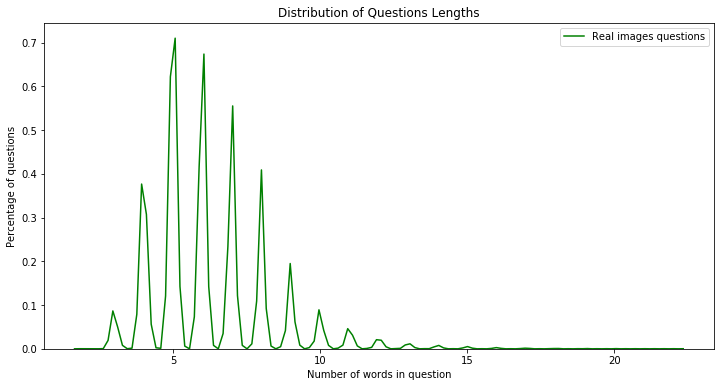

In [0]:
# Distribution of question length
plt.figure(figsize=(12,6))
sns.distplot(vqa_train_df['num_words_in_qtns'], hist=False, label='Real images questions', color='g')
plt.title("Distribution of Questions Lengths")
plt.xlabel("Number of words in question")
plt.ylabel("Percentage of questions")
plt.legend()
plt.show()

In [0]:
print("Maximum length of questions : ", max(vqa_train_df['num_words_in_qtns']))
print("Minumum length of questions : ", min(vqa_train_df['num_words_in_qtns']))
print("Mean length of questions : ", np.mean(vqa_train_df['num_words_in_qtns']))

Maximum length of questions :  22
Minumum length of questions :  2
Mean length of questions :  6.2015427362272595


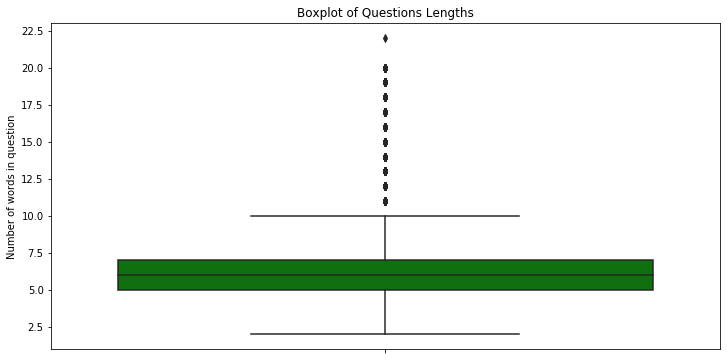

In [0]:
# Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(y=vqa_train_df['num_words_in_qtns'], color='g')
plt.title("Boxplot of Questions Lengths")
plt.ylabel("Number of words in question")
plt.show()

## NOTE : 
1. As we can see from the PDF that most of the questions are of length 5 words (more than 70%)
2. There are very few questions with few number of words or very large number of words.
3. Most questions range from 5 to 7.5 words

### 3.6 Word cloud will show the most frequent words in the question corpus.

In [0]:
# Function to plot the word cloud
def plot_word_cloud(txt):
    
    cloud = " ".join(word for word in txt)
    
    # call built-in method WordCloud for creating an object for drawing a word cloud
    wordcloud = WordCloud(width = 1000, height = 500, background_color ='black', 
                          stopwords = STOPWORDS).generate(cloud)
    
    # plot the WordCloud image
    plt.figure(figsize=(30,15))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.show()

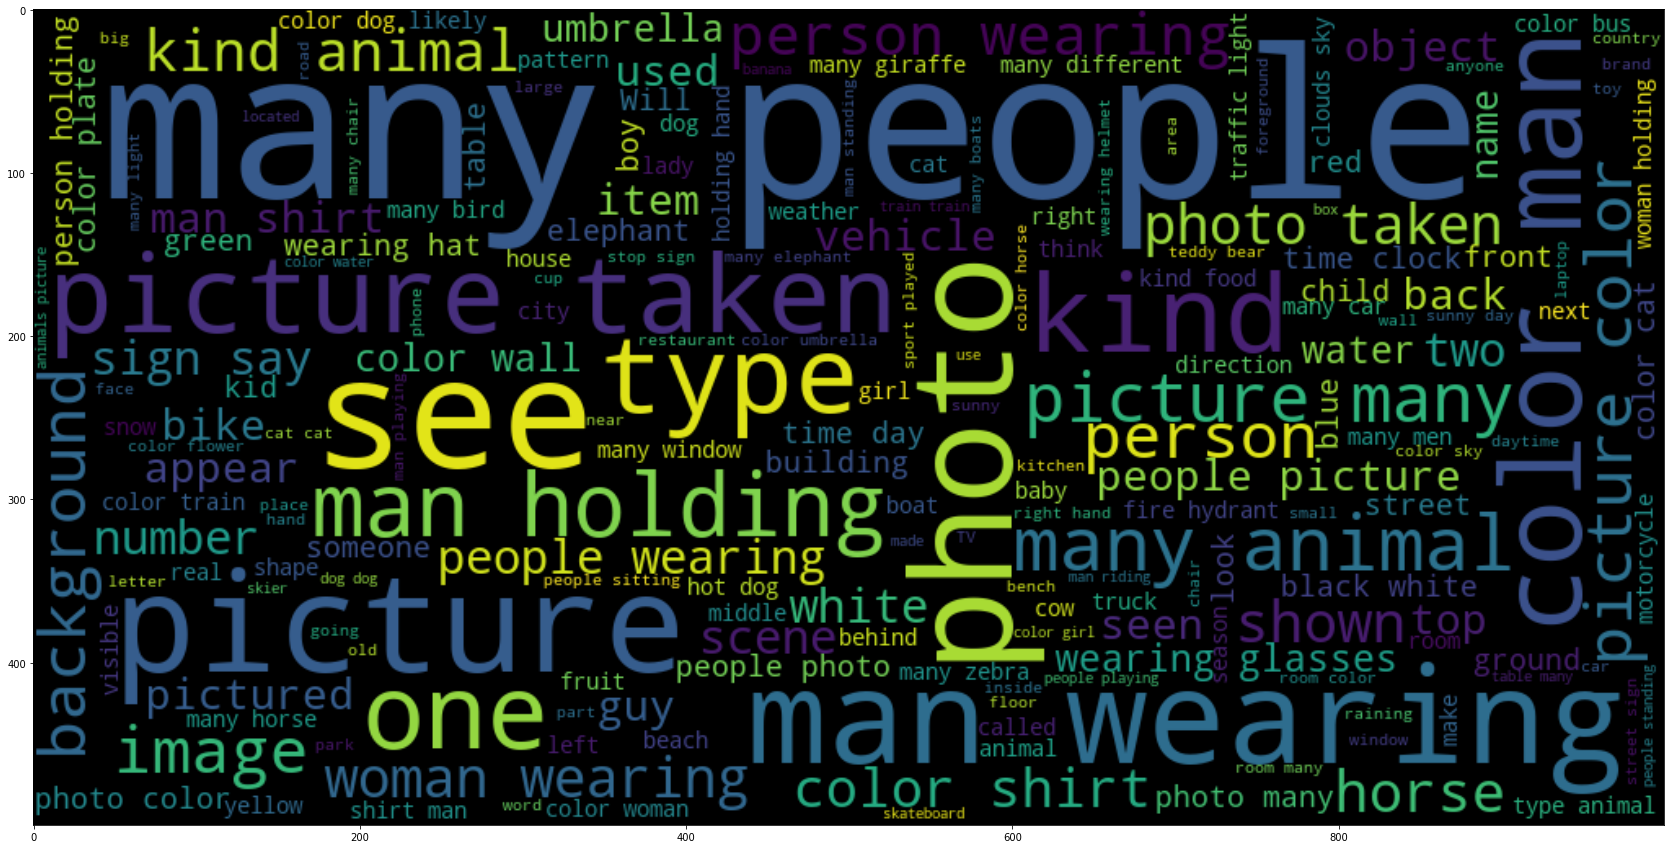

In [0]:
# Plotting the wordcloud
plot_word_cloud(list(vqa_train_df.question.values))

### 3.7 Plotting the distribution of duplicate and non duplicate question types

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3110815f8>],
      dtype=object)

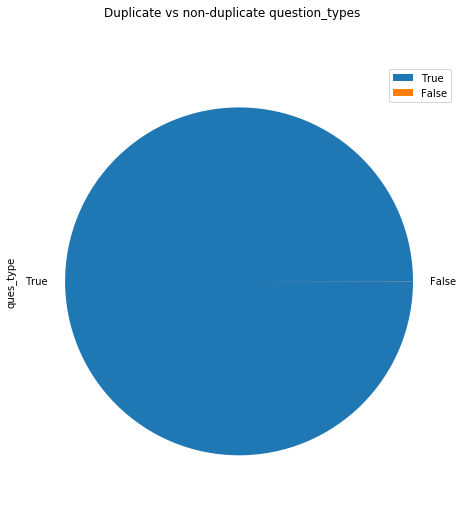

In [0]:
fig, ax = plt.subplots(figsize=(8,8))
pd.DataFrame(vqa_train_df['ques_type'].duplicated().value_counts()).plot(kind = 'pie', 
                                                                         subplots=True, 
                                                                         ax=ax, 
                                                                         title='Duplicate vs non-duplicate question_types')

__NOTE : This shows that almost all the questions are starting with one of the given starting phrase except for very very few questions with unique question_type__

### 3.8 Plotting top 50 most repeating starting phrase

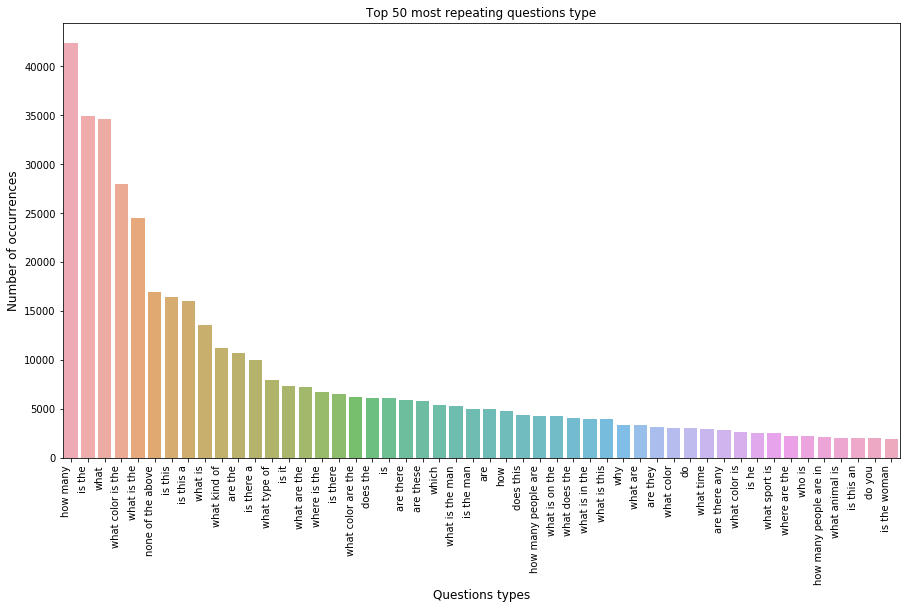

In [0]:
qtn_types_counts = vqa_train_df['ques_type'].value_counts()[:50,]

plt.figure(figsize=(15,8))
sns.barplot(qtn_types_counts.index, qtn_types_counts.values, alpha=0.8)
plt.xticks(rotation=90, horizontalalignment='right')
plt.title('Top 50 most repeating questions type')
plt.ylabel('Number of occurrences', fontsize=12)
plt.xlabel('Questions types', fontsize=12)
plt.show()

### 3.9 Combining the question type and the answer type and counting the answers per question type

In [0]:
# This will give us a dataframe with all the answer_types categories and a count of the answer 
# types per question_type.
# With this we can inference how different question_types are answered. 
# Whether they are answered by a YES/NO or With a numerical value or some unique answer (categorized as other)

vqa_train_df.groupby(['ques_type', 'ans_type']).count()['ans'].unstack()

ans_type                   number    other   yes/no
ques_type                                          
are                          10.0    146.0   4756.0
are the                       2.0    775.0   9924.0
are there                    17.0    105.0   5755.0
are there any                 1.0      NaN   2789.0
are these                     NaN    356.0   5426.0
are they                      1.0    138.0   2935.0
can you                       9.0     50.0   1669.0
could                         NaN      1.0   1697.0
do                            3.0     67.0   2942.0
do you                        1.0     47.0   1923.0
does the                      4.0    237.0   5862.0
does this                     2.0    176.0   4218.0
has                           1.0     10.0   1816.0
how                        1596.0   3144.0      NaN
how many                  42125.0    214.0      NaN
how many people are        4257.0     19.0      NaN
how many people are in     2058.0     13.0      NaN
is                            1.0    276.0   5802.0
is he                         NaN    111.0   2423.0
is it                         2.0    752.0   6591.0
is that a                     NaN    196.0   1389.0
is the                       13.0   3329.0  31585.0
is the man                    1.0    272.0   4699.0
is the person                 NaN    265.0   1429.0
is the woman                  4.0     59.0   1875.0
is there                     15.0     45.0   6453.0
is there a                    NaN     44.0   9938.0
is this                       9.0   1286.0  15149.0
is this a                     8.0   1218.0  14798.0
is this an                    NaN    147.0   1834.0
...                           ...      ...      ...
what are                      5.0   3272.0      NaN
what are the                145.0   7080.0      NaN
what brand                    4.0   1596.0      NaN
what color                    NaN   3032.0      NaN
what color are the            NaN   6183.0      NaN
what color is                 NaN   2649.0      NaN
what color is the             NaN  27962.0      NaN
what does the               175.0   3898.0      2.0
what is                      85.0  13469.0      7.0
what is in the                NaN   3990.0      NaN
what is on the                3.0   4251.0      NaN
what is the                1459.0  23036.0      7.0
what is the color of the      NaN   1750.0      NaN
what is the man               NaN   5236.0      2.0
what is the name             18.0   1600.0      NaN
what is the person            NaN   1729.0      NaN
what is the woman             NaN   1706.0      NaN
what is this                  5.0   3965.0      NaN
what kind of                  8.0  11184.0      NaN
what number is             1632.0     36.0      NaN
what room is                  NaN   1647.0      NaN
what sport is                 NaN   2527.0      NaN
what time                  1709.0   1205.0      NaN
what type of                  8.0   7954.0      NaN
where are the                 NaN   2161.0      NaN
where is the                  5.0   6729.0      NaN
which                       163.0   5219.0      NaN
who is                       16.0   2138.0      NaN
why                           5.0   3337.0      5.0
why is the                    3.0   1541.0      NaN

[65 rows x 3 columns]

### Lets take the sum of all the three columns

In [0]:
vqa_train_df.groupby(['ques_type', 'ans_type']).count()['ans'].unstack().sum()

ans_type
number     57606.0
other     219269.0
yes/no    166882.0
dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe307785f60>],
      dtype=object)

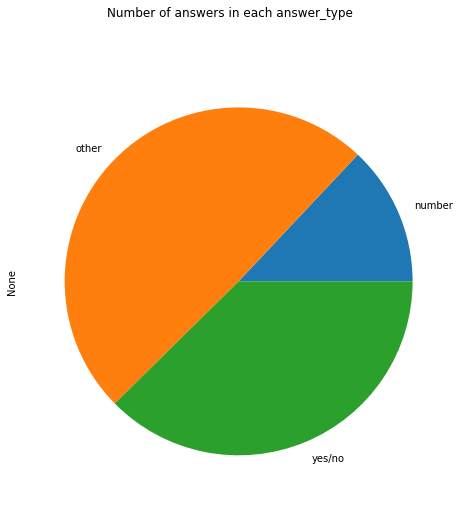

In [0]:
# Plot to understand the distribution of answers in the dataset as per answer type
fig, ax = plt.subplots(figsize=(10,8))
vqa_train_df.groupby(['ques_type', 'ans_type']).count()['ans'].unstack().sum().plot(kind='pie', 
                                                                                          ax=ax, 
                                                                                          subplots=True,
                                                                                          title='Number of answers in each answer_type')

## NOTE: 
1. As we can see there are 65 questions categories and 3 answer categories.
2. Out of the 3 categories in the answers `"OTHERS"` have the highest number of answers. This means most of the questions have a unique answer to the question asked with respect to the image.
3. If we make this a classification task there will be so many classes to classify from and the image might not always be the same. Same goes for the question. So making it a multiclass classification task will be pretty difficult.

## Q. What kind of questions are generally answers by these 3 categories??

### 3.10 Let's see what kind of answers are answered by a specific type of question

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe309125240>,
      dtype=object)

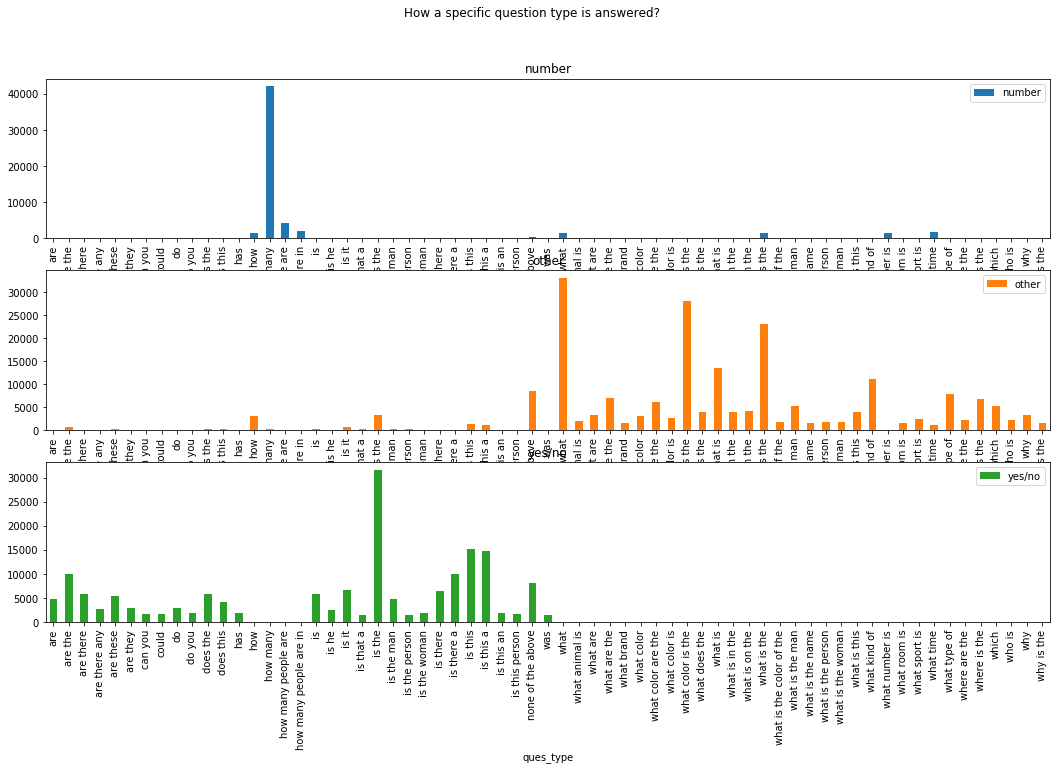

In [0]:
# Here we are trying to understand what kind of answers are generally given to a question type. 
# By this we will be able to understand how to answer a specific question if that question falls in a specific 
# category of question (question_type)

fig, ax = plt.subplots(figsize=(18,10))
vqa_train_df.groupby(['ques_type', 'ans_type']).count()['ans'].unstack().plot(kind='bar', 
                                                                              ax=ax, 
                                                                              subplots=True,
                                                                              title='How a specific question type is answered?')

## NOTE:
1. We can clearly see that more than 40K questions start with `"How many.."`. That means most answers for these questions will be a numerical value.
2. For `"What.."` kind of questions the answers will be more diverse and will increase the diversity of the answers. As we can see from the plot that most of the questions starting with `"What"` have "OTHER" answer category.
3. Questions starting with `"Is the.."`, `"Are.."`, `"Does.."` etc are typically answered using Yes/No.
4. Other questions types like `"What color"` or `"Which"` have more speciallized responses, such as colors, or "left" and "right", so they have a more diverse answer.

### 3.10 Plotting the wordcloud for question type + answer type

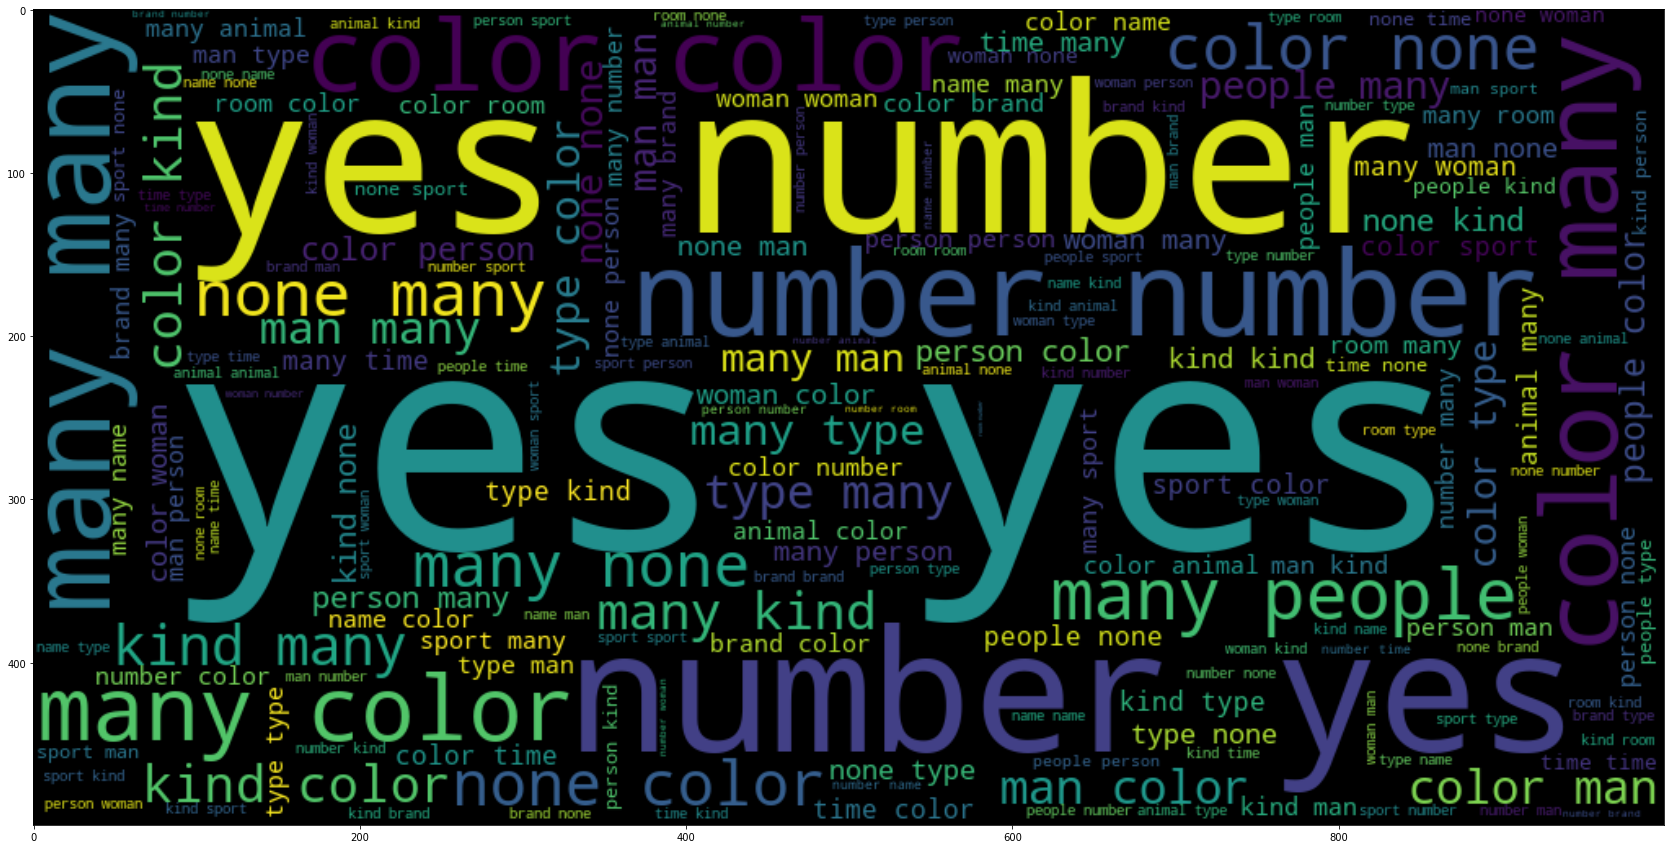

In [0]:
# Plotting the wordcloud
plot_word_cloud(list(vqa_train_df.ques_type.values)+list(vqa_train_df.ans_type.values))

### 3.11 Let's plot the distribution of word length in the answers

In [0]:
## Creating a new column as number of words present in the answer column
vqa_train_df["num_words_in_ans"] = vqa_train_df['ans'].apply(lambda x: len(str(x).split()))

In [0]:
vqa_train_df.head()

ans ans_type                                          img_path  \
0      net    other  images/train2014/COCO_train2014_000000458752.jpg   
1  pitcher    other  images/train2014/COCO_train2014_000000458752.jpg   
2   orange    other  images/train2014/COCO_train2014_000000458752.jpg   
3      yes   yes/no  images/train2014/COCO_train2014_000000458752.jpg   
4    white    other  images/train2014/COCO_train2014_000000262146.jpg   

     ques_id          ques_type                                     question  \
0  458752000       what is this    What is this photo taken looking through?   
1  458752001               what           What position is this man playing?   
2  458752002  what color is the             What color is the players shirt?   
3  458752003            is this  Is this man a professional baseball player?   
4  262146000  what color is the                      What color is the snow?   

   num_words_in_qtns  num_words_in_ans  
0                  7                 1  
1                  6                 1  
2                  6                 1  
3                  7                 1  
4                  5                 1

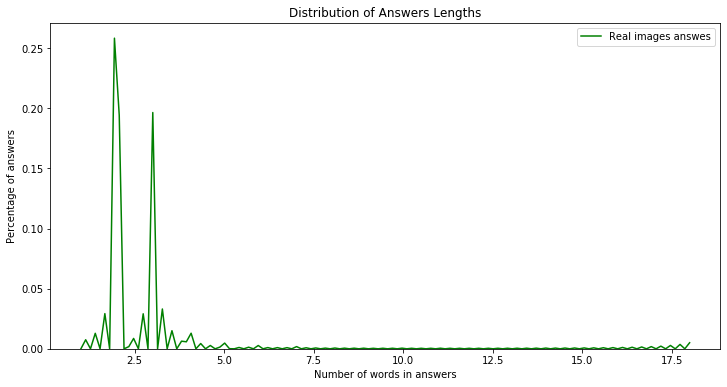

In [0]:
# Distribution of ans length
plt.figure(figsize=(12,6))
sns.distplot(vqa_train_df['num_words_in_ans'], hist=False, label='Real images answes', color='g')
plt.title("Distribution of Answers Lengths")
plt.xlabel("Number of words in answers")
plt.ylabel("Percentage of answers")
plt.legend()
plt.show()

In [0]:
print("Maximum length of answers : ", max(vqa_train_df['num_words_in_ans']))
print("Minumum length of answers : ", min(vqa_train_df['num_words_in_ans']))
print("Mean length of answers : ", np.mean(vqa_train_df['num_words_in_ans']))

Maximum length of answers :  18
Minumum length of answers :  1
Mean length of answers :  1.0996175834972743


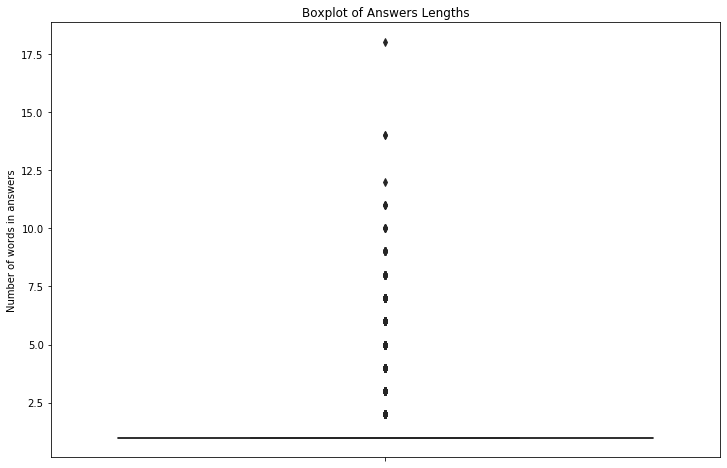

In [0]:
# Boxplot
plt.figure(figsize=(12,8))
sns.boxplot(y=vqa_train_df['num_words_in_ans'], color='g')
plt.title("Boxplot of Answers Lengths")
plt.ylabel("Number of words in answers")
plt.show()

## NOTE : 
1. As we can see from the PDF that most of the answers are of length 1 or 2 words
2. There are very few questions with long answers.
3. Most answers range from 1 to 3 words.

## Q. If we want to make this a multiclass classification task then how many classes do we need?

### 3.12 Let's see the distribution of the top 50 answers

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2fa6189b0>],
      dtype=object)

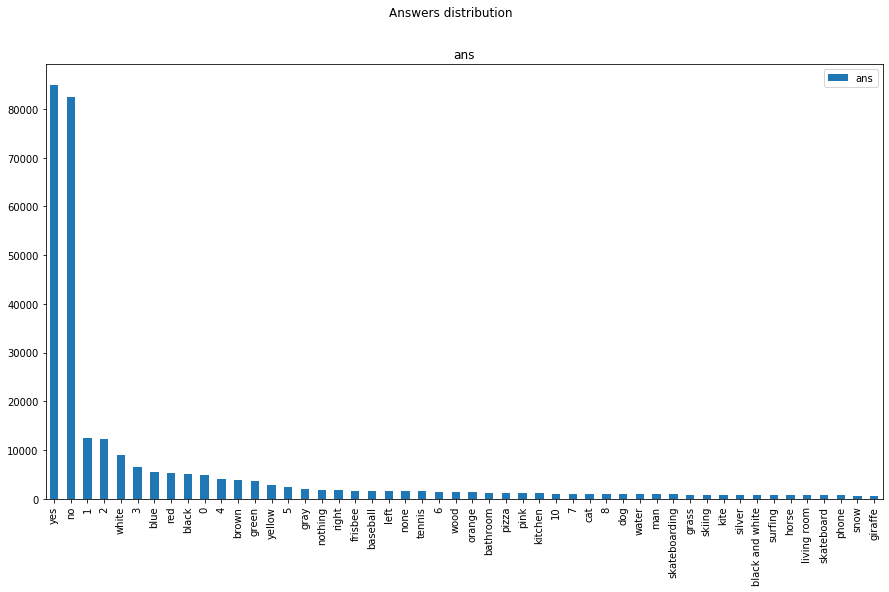

In [0]:
fig, ax = plt.subplots(figsize=(15,8))
pd.DataFrame(vqa_train_df['ans'].value_counts()[0:50,]).plot(kind='bar',
                                                      ax=ax,
                                                      subplots=True,
                                                      title='Answers distribution')

### 3.12 Counting the top 1000 answers in the given dataset

In [0]:
vqa_answers_df = pd.DataFrame(vqa_train_df['ans'].value_counts()[:1000,]).reset_index()
vqa_answers_df.rename(columns={'index':'answers','ans':'count'}, inplace=True)
vqa_answers_df['percentage_count'] = pd.DataFrame(vqa_train_df['ans'].value_counts(normalize=True)[:1000,]).reset_index()['ans']

In [0]:
vqa_answers_df

answers  count  percentage_count
0              yes  84978          0.191497
1               no  82516          0.185949
2                1  12540          0.028259
3                2  12215          0.027526
4            white   8916          0.020092
5                3   6536          0.014729
6             blue   5455          0.012293
7              red   5201          0.011720
8            black   5066          0.011416
9                0   4977          0.011216
10               4   4118          0.009280
11           brown   3814          0.008595
12           green   3750          0.008451
13          yellow   2792          0.006292
14               5   2367          0.005334
15            gray   2113          0.004762
16         nothing   1814          0.004088
17           right   1766          0.003980
18         frisbee   1641          0.003698
19        baseball   1597          0.003599
20            left   1565          0.003527
21            none   1563          0.003522
22          tennis   1502          0.003385
23               6   1455          0.003279
24            wood   1449          0.003265
25          orange   1425          0.003211
26        bathroom   1230          0.002772
27           pizza   1203          0.002711
28            pink   1202          0.002709
29         kitchen   1093          0.002463
..             ...    ...               ...
970           thin     28          0.000063
971         cherry     28          0.000063
972            fur     28          0.000063
973        railing     28          0.000063
974       in front     28          0.000063
975        country     28          0.000063
976          snowy     28          0.000063
977         tattoo     28          0.000063
978          tired     28          0.000063
979            log     28          0.000063
980          chips     28          0.000063
981       children     28          0.000063
982           mutt     28          0.000063
983  cross country     28          0.000063
984          reins     28          0.000063
985        plaster     28          0.000063
986          cones     28          0.000063
987            oil     28          0.000063
988             32     27          0.000061
989          drink     27          0.000061
990            arm     27          0.000061
991          10:20     27          0.000061
992        on pole     27          0.000061
993       swinging     27          0.000061
994  washington dc     27          0.000061
995        harness     27          0.000061
996           main     27          0.000061
997         dishes     27          0.000061
998         friend     27          0.000061
999              s     27          0.000061

[1000 rows x 3 columns]

In [0]:
# Sum of all the top 1000 answer counts
vqa_answers_df['count'].sum()

388158

In [0]:
print("Percentage of questions convered by top 1000 answers : ", 
      (vqa_answers_df['count'].sum()/len(vqa_train_df))*100, "%")

Percentage of questions convered by top 1000 answers :  87.47084553032403 %


## NOTE : 
1. As we can see we can do a 1000 class classification task as many of the questions (around 388158 out of 443757) will be covered by this classification task.
2. Most of the answers in the dataset is YES/NO answers and some numerical values. Others are just one word answers and their count is very few.

### 3.13 Let's see the questions and answers distribution in the train and test set

In [0]:
# Loading the train data 
vqa_train_df = pd.DataFrame(json.load(open('data/vqa_raw_train.json', 'r')))

# Loading the test data 
vqa_test_df = pd.DataFrame(json.load(open('data/vqa_raw_test.json', 'r')))

### Top 50 answers distributions

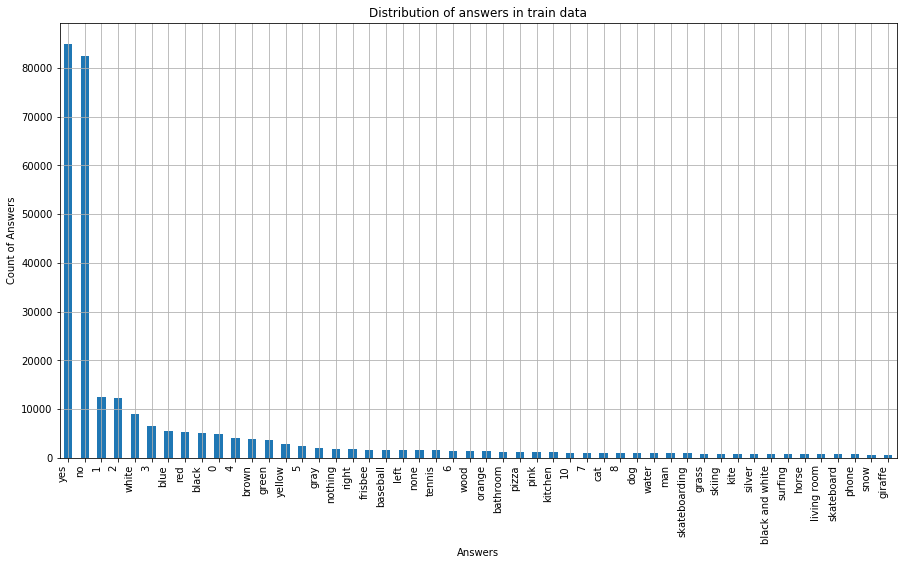

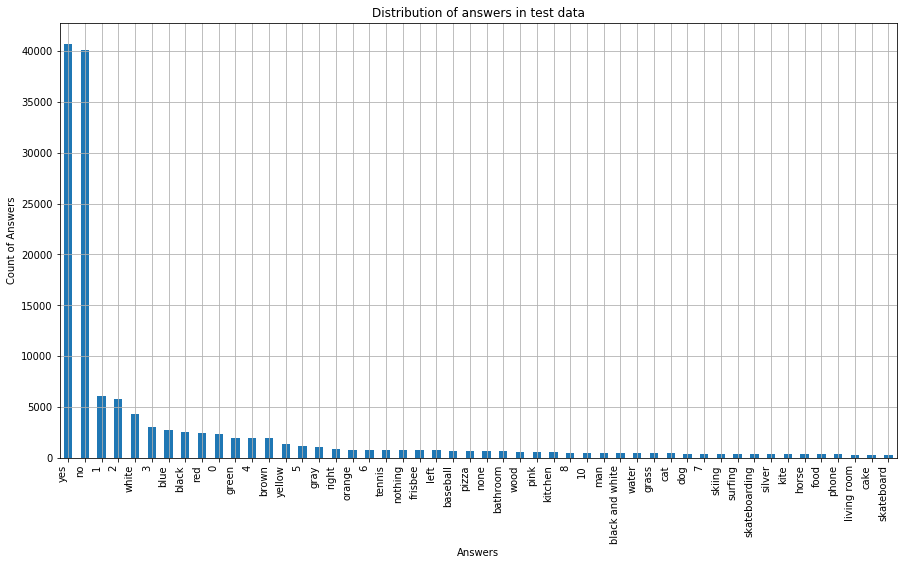

In [0]:
# Collecting the value counts of ans column for train and test sets
train_ans_distribution = vqa_train_df['ans'].value_counts()[:50,]
test_ans_distribution = vqa_test_df['ans'].value_counts()[:50,]

# Plotting the train set
plt.figure(figsize = (15, 8))
train_ans_distribution.plot(kind='bar')
plt.xticks(rotation=90, horizontalalignment='right')
plt.xlabel('Answers')
plt.ylabel('Count of Answers')
plt.title('Distribution of answers in train data')
plt.grid()
plt.show()

print("="*110)

# Plotting the test set
plt.figure(figsize = (15, 8))
test_ans_distribution.plot(kind='bar')
plt.xticks(rotation=90, horizontalalignment='right')
plt.xlabel('Answers')
plt.ylabel('Count of Answers')
plt.title('Distribution of answers in test data')
plt.grid()
plt.show()

### Top 50 questions distributions

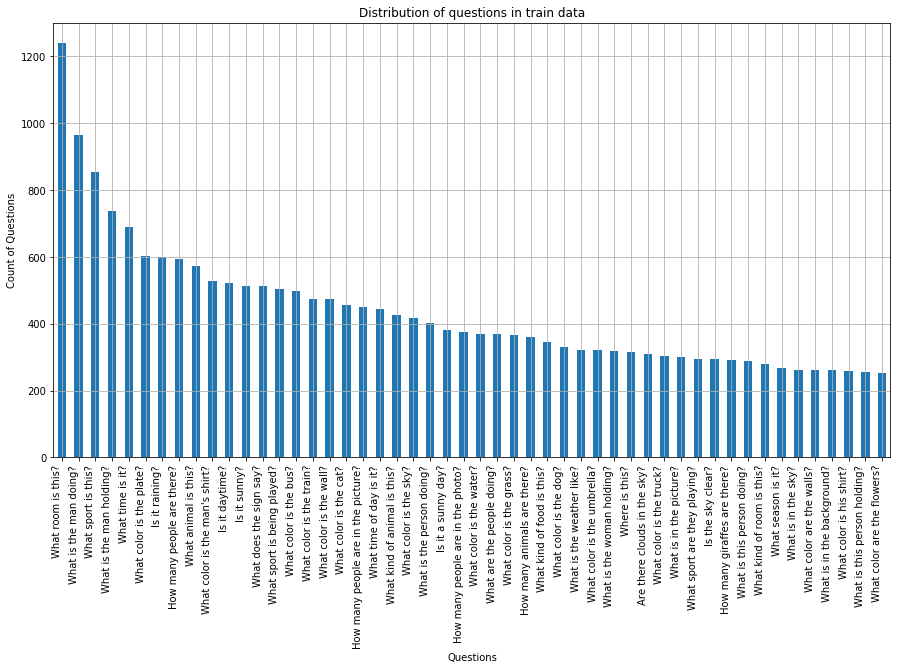

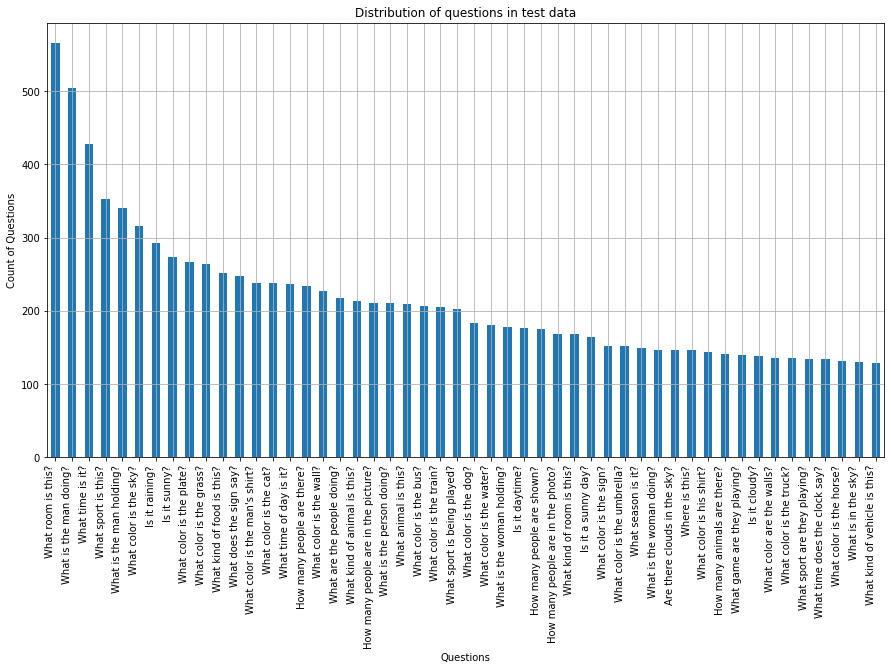

In [0]:
# Collecting the value counts of ans column for train and test sets
train_qtn_distribution = vqa_train_df['question'].value_counts()[:50,]
test_qtn_distribution = vqa_test_df['question'].value_counts()[:50,]

# Plotting the train set
plt.figure(figsize = (15, 8))
train_qtn_distribution.plot(kind='bar')
plt.xticks(rotation=90, horizontalalignment='right')
plt.xlabel('Questions')
plt.ylabel('Count of Questions')
plt.title('Distribution of questions in train data')
plt.grid()
plt.show()

print("="*110)

# Plotting the test set
plt.figure(figsize = (15, 8))
test_qtn_distribution.plot(kind='bar')
plt.xticks(rotation=90, horizontalalignment='right')
plt.xlabel('Questions')
plt.ylabel('Count of Questions')
plt.title('Distribution of questions in test data')
plt.grid()
plt.show()

## CONCLUSION:
1. Open ended questions result in a diverse set of possible answers.
2. For some questions a simple yes or no is sufficient but for many questions (like question starting with "WHAT") the answer diversity increases.
3. Some questions are answered by a short phrase as well but such answers are very less as most of the answers are just 1 word.
4. As per the paper :
    - For every question there were 10 answers collected and finally they were evaluated using the following accuracy metric :
    - accuracy = min{(Number of humans taht provided that answers / 3) , 1}
5. There are many repeated questions for the images (as shown in the EDA) because the question may be same but answer varies as per the given image.
6. There are 65 `questions type` and 3 `answer_types` in the dataset.
7. Question length for most of the questions is between 5-8 and Answer length for most of the questions is just 1 or 2 words.

# 4. VQA baselines and Methods (Building DL models)

### 4.1 Importing the libraries

In [1]:
import sys, warnings
warnings.filterwarnings("ignore")

# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/"
# base_dir = root_dir + 'Colab Notebooks/'
base_dir = './'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns
import json
import os
import re
import cv2
import math
import pickle
import scipy
import cv2
import h5py
from glob import glob
from random import shuffle, sample

from time import time
from tqdm import tqdm
from collections import Counter
from datetime import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
# from progressbar import Bar, ETA, Percentage, ProgressBar

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.initializers import he_uniform, he_normal
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras.layers import Dense, BatchNormalization, Convolution2D, Input, MaxPooling2D, Reshape
from tensorflow.keras.layers import Dropout, LSTM, Embedding, Flatten, Activation, Concatenate, multiply, concatenate, Multiply
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.utils import to_categorical, plot_model, Sequence

np.random.seed(0)
tf.set_random_seed(0)
print("Libraries loaded")

Libraries loaded


### 4.2 Reading the data

In [0]:
# Loading the train data 
vqa_train_df = pd.DataFrame(json.load(open('data/vqa_raw_train.json', 'r')))

# Loading the test data 
vqa_test_df = pd.DataFrame(json.load(open('data/vqa_raw_test.json', 'r')))

In [0]:
print("Shape of train data : ", vqa_train_df.shape)
print("Shape of train data : ", vqa_test_df.shape)

Shape of train data :  (443757, 6)
Shape of train data :  (214354, 6)


### Dropping unwanted columns

In [0]:
# Train data
vqa_train_df.drop(['ans_type', 'ques_id', 'ques_type'], axis=1, inplace=True)

# Test data
vqa_test_df.drop(['ans_type', 'ques_id', 'ques_type'], axis=1, inplace=True)

print("Shape of train data : ", vqa_train_df.shape)
print("Shape of train data : ", vqa_test_df.shape)

Shape of train data :  (443757, 3)
Shape of train data :  (214354, 3)


In [0]:
vqa_train_df.head()

ans                                          img_path  \
0      net  images/train2014/COCO_train2014_000000458752.jpg   
1  pitcher  images/train2014/COCO_train2014_000000458752.jpg   
2   orange  images/train2014/COCO_train2014_000000458752.jpg   
3      yes  images/train2014/COCO_train2014_000000458752.jpg   
4    white  images/train2014/COCO_train2014_000000262146.jpg   

                                      question  
0    What is this photo taken looking through?  
1           What position is this man playing?  
2             What color is the players shirt?  
3  Is this man a professional baseball player?  
4                      What color is the snow?

## `Preprocessing the questions`

In [0]:
%%time
# Note:
# This block takes a lot of time to run.

# Function for preprocessing the questions
def nlp_preprocessing(total_text, index, column, df):
    
    if type(total_text) is not int:
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
            
    df[column][index] = total_text


CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 12.9 µs


### Training data preprocessing

In [0]:
%%time
# Text processing for train
for index, qtn in tqdm(vqa_train_df.iterrows()):
    if type(qtn['question']) is str:
        nlp_preprocessing(qtn['question'], index, 'question', vqa_train_df)
    else:
        print("there is no text description for id:",index)

443757it [1:42:24, 72.21it/s]

CPU times: user 1h 42min 23s, sys: 29.8 s, total: 1h 42min 53s
Wall time: 1h 42min 24s


In [0]:
vqa_train_df['question'].values

array(['what is this photo taken looking through ',
       'what position is this man playing ',
       'what color is the players shirt ', ...,
       'what color is the computer ', 'why are there two keyboards ',
       'is that a laptop '], dtype=object)

In [0]:
# Dumping the final processed dataframe
vqa_train_df.to_json("data/final_qtns_ans_train.json", orient='records')
print("Data saved..")

Data saved..


### Testing data preprocessing

In [0]:
# Text processing for test
for index, qtn in tqdm(vqa_test_df.iterrows()):
    if type(qtn['question']) is str:
        nlp_preprocessing(qtn['question'], index, 'question', vqa_test_df)
    else:
        print("there is no text description for id:",index)

214354it [31:45, 116.73it/s]


In [0]:
# Dumping the final processed dataframe
vqa_test_df.to_json("data/final_qtns_ans_test.json", orient='records')
print("Data saved..")

Data saved..


<h2>***********************************************************************************************************</h2>

## 4.2.1 Downloading the train and val images

In [0]:
%%time
# Making a directory
!rm -rf sample_data
!mkdir data
!mkdir images

# Downloading the training images
print("Downloading data...")
os.system('wget http://images.cocodataset.org/zips/train2014.zip -P images/')
print('Unzipping the datasets...')
os.system('unzip images/train2014.zip -d images/')
# Deleting the zip
!rm images/train2014.zip

# Downloading the test images
print("Downloading data...")
os.system('wget http://images.cocodataset.org/zips/val2014.zip -P images/')
print('Unzipping the datasets...')
os.system('unzip images/val2014.zip -d images/')
# Deleting the zip
!rm images/val2014.zip


Unzipping the datasets...
Unzipping the datasets...
CPU times: user 510 ms, sys: 107 ms, total: 617 ms
Wall time: 24min 29s


## 4.3 Reading the clean data

In [2]:
# Final train data
vqa_train_df = pd.DataFrame(json.load(open(base_dir + "data/final_qtns_ans_train.json", 'r')))

# Final test data
vqa_test_df = pd.DataFrame(json.load(open(base_dir + "data/final_qtns_ans_test.json", 'r')))

print("Shape of train data : ", vqa_train_df.shape)
print("Shape of test data : ", vqa_test_df.shape)

Shape of train data :  (443757, 3)
Shape of test data :  (214354, 3)


## 4.3.1 Creating the Label matrix

## NOTE:
1. As we have seen in the EDA that the Top 1000 answers cover 87.47 % of the entire answers.
2. We will use these answers and will build a 1001 class classification task.
3. We will classify rest of the answers as 'other' class i.e. 12.53 % of the answers will belong to 'other' class.

__We need to encode the text labels to 1001 numerical classes__

In [3]:
# Function to encode the values
def encode_labels(data, vocab = None):
    """
    This function takes the categorical data and encodes them to numerical values
    
    Parameters:
    data : array of categorical data
    vocab : Vocablary on the train data. **should be a list of text vocabulary
    
    NOTE:
    - returns vocabulary dictionary
    - If vocabulary is passed along with the new data then it transforms the trained vocabulary on the new data
    - returns encoded data
    """
    
    if vocab == None:
        
        raise ("Vocabulary needed")
    
    if vocab is not None:
        # creating the embeddings
        labels = np.zeros(data.shape, dtype = object)
        
        for i, _cat in enumerate(data):
            if _cat in vocab:
                labels[i] = _cat
            else:
                labels[i] = 'other'
        
        # Returns the embeddings
        return labels

In [4]:
# Getting the top 1000 answers
top_1000_ans = list(vqa_train_df['ans'].value_counts()[:1000,].index)

# Creating the labels
vqa_train_df['label'] = encode_labels(vqa_train_df['ans'].values, vocab = top_1000_ans)
vqa_test_df['label'] = encode_labels(vqa_test_df['ans'].values, vocab = top_1000_ans)

# Dropping the 'ans' column
vqa_train_df.drop(['ans'], axis=1, inplace=True)
vqa_test_df.drop(['ans'], axis=1, inplace=True)

print("Unique labels or Number of classes : ", len(top_1000_ans)+1)
print("The Shape of the train labels : ", vqa_train_df['label'].shape)
print("The Shape of the test labels : ", vqa_test_df['label'].shape)

Unique labels or Number of classes :  1001
The Shape of the train labels :  (443757,)
The Shape of the test labels :  (214354,)


In [5]:
vqa_train_df.head()

img_path  \
0  images/train2014/COCO_train2014_000000458752.jpg   
1  images/train2014/COCO_train2014_000000458752.jpg   
2  images/train2014/COCO_train2014_000000458752.jpg   
3  images/train2014/COCO_train2014_000000458752.jpg   
4  images/train2014/COCO_train2014_000000262146.jpg   

                                      question    label  
0    what is this photo taken looking through       net  
1           what position is this man playing   pitcher  
2             what color is the players shirt    orange  
3  is this man a professional baseball player       yes  
4                      what color is the snow     white

## 4.3.2 Converting the 1001 classes to 1001-dim label vector

In [6]:
# Using label encoder to convert the labels to numerical Labels
label_encoder = LabelEncoder()
label_encoder.fit(vqa_train_df['label'].values)

num_train_labels = label_encoder.transform(vqa_train_df['label'].values)
num_test_labels = label_encoder.transform(vqa_test_df['label'].values)

# Converting the classes to 1001 dim
y_train = to_categorical(num_train_labels, num_classes=1001, dtype='int32')
y_test = to_categorical(num_test_labels, num_classes=1001, dtype='int32')

print("After converting the output into a vector :")
print("Shapes : ")
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

After converting the output into a vector :
Shapes : 
y_train :  (443757, 1001)
y_test :  (214354, 1001)


## 4.4 Declaring some constants

In [7]:
# Checking the question length for declaring the MAX_SEQUENCE variable
qtn_len = vqa_train_df['question'].apply(lambda x: len(str(x).split()))
# Checking the ans length
ans_len = vqa_train_df['label'].apply(lambda x: len(str(x).split()))

print("Answer lengths value counts :\n",ans_len.value_counts())
print("-"*80)
print("Question lengths value counts :\n",qtn_len.value_counts())

Answer lengths value counts :
 1    432758
2      8343
3      2620
4        36
Name: label, dtype: int64
--------------------------------------------------------------------------------
Question lengths value counts :
 5     114324
6      88351
7      74562
4      58843
8      46046
9      22730
10     12071
3      11768
11      6942
12      3691
13      1888
14      1086
15       631
16       379
17       203
18       115
19        70
20        35
2         17
21         4
22         1
Name: question, dtype: int64


In [8]:
# Sequence length for Questions
MAX_SEQ_LEN = 23
EMBEDDING_SIZE = 300
GLOVE_PATH = base_dir + 'data/glove.42B.300d.txt'

## 4.4.1 Encoding the text data 

1. References : https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py
2. References : https://medium.com/@ppasumarthi_69210/word-embeddings-in-keras-be6bb3092831
3. References : https://www.kaggle.com/stacykurnikova/using-glove-embedding

## NOTE : 
1. As we already know the maximum length of words in the questions is 22. So we will tokenize the words and will create a padding upto 23 words.

In [9]:
%%time
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

# Preparing tokenizer
text_tokenizer = Tokenizer()

# Fitting on Train text of the dataset
text_tokenizer.fit_on_texts(vqa_train_df['question'].tolist())

# Defining Vocabulary size
text_vocabulary_size = len(text_tokenizer.word_index)+1

# Tokenizing text to sequence of unique integers
X_train_sequence = text_tokenizer.texts_to_sequences(vqa_train_df['question'].tolist())
X_test_sequence = text_tokenizer.texts_to_sequences(vqa_test_df['question'].tolist())

# Applying padding for those essays who are shorter (post padding)
X_train_pad = pad_sequences(X_train_sequence, maxlen = MAX_SEQ_LEN, padding='pre')
X_test_pad = pad_sequences(X_test_sequence, maxlen = MAX_SEQ_LEN, padding='pre')

print("X_train Text data shape : ", X_train_pad.shape)
print("X_test Text data shape : ", X_test_pad.shape)
print("The vocabulary size (based on train data) : ", text_vocabulary_size)

X_train Text data shape :  (443757, 23)
X_test Text data shape :  (214354, 23)
The vocabulary size (based on train data) :  13133
CPU times: user 18.8 s, sys: 33.4 ms, total: 18.8 s
Wall time: 18.7 s


## 4.4.2 Extract word embeddings from the Glove

In [10]:
%%time
# https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html
# Loading the whole embedding in the memory

print('Loading word vectors...')
embeddings_index = dict()
f = open(GLOVE_PATH, encoding="utf8")
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

1140it [00:00, 11399.30it/s]

Loading word vectors...


1917495it [02:44, 11632.00it/s]

Found 1917495 word vectors.
CPU times: user 2min 39s, sys: 3.8 s, total: 2min 42s
Wall time: 2min 44s


## 4.4.3 Create a weight matrix

In [11]:
%%time

# The matrix is used to initialize weights in the Embedding layer of the model
embedding_matrix = np.zeros((text_vocabulary_size, EMBEDDING_SIZE))
for word, i in text_tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # if words not found, embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

CPU times: user 34.3 ms, sys: 60 µs, total: 34.3 ms
Wall time: 33.7 ms


### Declaring Hyperparameters

In [12]:
# Hyperparameters
num_classes = 1001
EPOCHS = 3
BATCH_SIZE = 1
IMG_HEIGHT = 224
IMG_WIDTH = 224
CHANNEL = 3
TRAIN_STEPS_PER_EPOCH = int(len(vqa_train_df['img_path'])/BATCH_SIZE)
TEST_STEPS_PER_EPOCH = int(len(vqa_test_df['img_path'])/BATCH_SIZE)

# Paths to the images
TRAIN_SOURCE_IMAGES = os.path.join("images/train2014/")
TEST_SOURCE_IMAGES = os.path.join("images/val2014/")

train_image_count = len(glob(os.path.join(TRAIN_SOURCE_IMAGES, "*.jpg")))
test_image_count = len(glob(os.path.join(TEST_SOURCE_IMAGES, "*.jpg")))

# 5. BUILDING THE MODEL

## 5.0 ACHICTECTURE

<img src='https://miro.medium.com/max/3400/1*QbWaFSNaO3GTgjQZOxhdDg.png'>

### 5.1 Building the LSTM model

In [13]:
def build_LSTM(question_input_shape):
    
    """
    This function will return an embedding of the image with a sahpe of 1024-dim vector
    """
    # load pre-trained word embeddings into an Embedding layer
    # Note that we set trainable = False
    
    # Text data Embeddings
    embed = Embedding(input_dim = text_vocabulary_size, output_dim = EMBEDDING_SIZE,
                      weights = [embedding_matrix], trainable = False)(question_input_shape)
    
    # LSTM layers
    lstm_1 = LSTM(units=512, return_sequences=True, input_shape=(MAX_SEQ_LEN, EMBEDDING_SIZE))(embed)
    drop_1 = Dropout(0.5)(lstm_1)

    lstm_2 = LSTM(units=512, return_sequences=False)(drop_1)
    drop_2 = Dropout(0.5)(lstm_2)

    # We will add a 1024-dim non-linear tanh dense layer
    encoded_question = Dense(units=1024, activation='tanh')(drop_2)

    return encoded_question


### 5.2 Building the VGG model

In [14]:
# Function to build the image channel (out of the two channels)
# This channel provides an embedding for the image (using `norm I` embedding as mentioned in the paper)

def build_vgg16(image_shape):
    
    """
    This function will return an embedding of the image with a sahpe of 1024-dim vector
    """
    
    # Creating a Sequential model for the Vision model
    vision_model = Sequential()

    # Getting back the convolutional part of a VGG network trained on ImageNet (without the final layers)
    vgg16_model = VGG16(weights='imagenet', include_top=True, input_shape = (224, 224, 3))

    # Looping over all the layers and adding them in the model except the last layer (predict layer)
    for layer in vgg16_model.layers[:-1]: 
        vision_model.add(layer)

    # Freeze the layers 
    for layer in vision_model.layers:
        layer.trainable = False

    # The final layer is a 4092-dim layer that needs to be changed to 1024 dim,
    # since the point-wise multiplication expects same shapes
    # We will add a 1024-dim non-linear tanh dense layer
    vision_model.add(Dense(units=1024, activation='tanh'))

    # Encodings of the image
    encoded_image = vision_model(image_shape)

    return encoded_image


### 5.3 Concatinating both the models and Building the Final model

In [15]:
# Clearning the tensorflow session
tf.keras.backend.clear_session()

### Taking the inputs
# Input images [ format (here 224x224x3) ]
input_images = Input(shape=(IMG_HEIGHT, IMG_WIDTH, CHANNEL), name='image_input')

# Questions inputs
input_questions = Input(shape=(MAX_SEQ_LEN,), name='qtns_input')

# -------------------------------------------------------------------------------------------------------------------------

## Collecting the output of the Vision model and LSTM layers and Multipling them

# CNN model output -> 25088 non-linear tanh output
vision_output = build_vgg16(input_images)

# Lstm model -> 1024 non-linear tanh output
lstm_output = build_LSTM(input_questions)

# -------------------------------------------------------------------------------------------------------------------------

# Taking the point-wise multiplication of the two layers outputs 
print("Merging the models....")

# Final model building - Point-wise multiplication
mult_vgg_lstm = multiply([vision_output, lstm_output])

# Adding fully connected layer
full_con = Dense(units = 1000, activation='relu')(mult_vgg_lstm)

# Adding dropout
full_con = Dropout(rate = 0.5)(full_con)

# Adding softmax
predict_layer = Dense(units = num_classes, activation='softmax', name='final_output')(full_con)

# Final Model
final_model = Model(inputs=[input_images, input_questions], outputs=predict_layer)

# Model summary
final_model.summary()

# Compiling the model
final_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Saving the final model
final_model.save(base_dir + 'checkpoints/final_model.h5')
print("Model Saved")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Merging the models....
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
qtns_input (InputLayer)         [(None, 23)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 23, 300)      3939900     qtns_input[0][0]                 
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 23, 512)      1665024     embedding[0][0]                  
_________________________________

### 5.4 Visualize the model

In [16]:
# # Plotting the model
# plot_model(model = final_model, show_shapes=True, show_layer_names=True, expand_nested=True, to_file = base_dir + 'model_img/model_2.png')

### 5.5 Defining the Callbacks

In [17]:
## Reference : https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau?version=stable

# Callbacks

# Instantiating tensorboard
logdir = base_dir + "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

# History of the training
history = tf.keras.callbacks.History()

# Creating checkpoints
best_model = ModelCheckpoint(filepath = base_dir + 'checkpoints/best_model_weights.h5', 
                             monitor = 'val_loss', save_best_only=True, mode = 'min')

# # Monitor learning rate
# learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', patience=3, 
#                                                                verbose=0, factor=0.25, min_lr=0.0001)

callbacks_list = [tensorboard_callback, best_model, history]

## 5.6 Preparing the images and text in batches

### 5.6.1 Loading the images and question via custom Generator function

In [18]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
datagen = image.ImageDataGenerator(rescale=1./255)

# Function to read the images from the directory and the question sequences 
# NOTE : We will not shuffle the data as the corresponding question is taken from another array and the images paths are in another dataframe

def multiple_input_generator(generator, image_df, text_pad_seq, BATCH_SIZE,
                             IMG_HEIGHT, IMG_WIDTH, labels, TRAIN=True):
    
    """
    This function yields images, questions and their corrsponding labels. 
    It is a image and question generator
    """

    if TRAIN:
        # Traing image data generator
        # Shuffel is dissabled since the corresponding questions are taken from different array
        img_gen = generator.flow_from_dataframe(dataframe=image_df, 
                                                directory=None,
                                                x_col='img_path',
                                                y_col='label',
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                batch_size=BATCH_SIZE,
                                                shuffle=False,
                                                validate_filenames=True)
        
    else:
        # Testing image data generator
        img_gen = generator.flow_from_dataframe(dataframe=image_df,
                                                directory=None,
                                                x_col='img_path',
                                                y_col='label',
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                batch_size=BATCH_SIZE,
                                                shuffle=False,
                                                validate_filenames=True)
    
    # For iterating over batches
    i = 0;

    # Iterating over the entire data and then yelding the image_data, text_data and the labels
    while True:

        # collecting the images array per batch
        img_data = img_gen.next()
        # collecting the question array per batch
        text_data = text_pad_seq[i*BATCH_SIZE : (i+1)*BATCH_SIZE]
        # collecting the labels array per batch
        y_label = labels[i*BATCH_SIZE : (i+1)*BATCH_SIZE]
        
        i += 1
    
        # yielding the data in batches
        yield ({'image_input': img_data[0], 'qtns_input': text_data}, {'final_output': y_label})

### 5.6 Fitting the data in the model

In [ ]:
# Generating the inputs for train
train_input_generator = multiple_input_generator(generator=datagen,
                                                image_df=vqa_train_df,
                                                text_pad_seq=X_train_pad,
                                                BATCH_SIZE=BATCH_SIZE,
                                                IMG_HEIGHT=IMG_HEIGHT,
                                                IMG_WIDTH=IMG_WIDTH,
                                                labels=y_train, 
                                                TRAIN=True)

test_input_generator = multiple_input_generator(generator=datagen,
                                                image_df=vqa_test_df,
                                                text_pad_seq=X_test_pad,
                                                BATCH_SIZE=BATCH_SIZE,
                                                IMG_HEIGHT=IMG_HEIGHT,
                                                IMG_WIDTH=IMG_WIDTH,
                                                labels=y_test, 
                                                TRAIN=False)

history = final_model.fit_generator(generator = train_input_generator,
                                    epochs = EPOCHS,
                                    steps_per_epoch = TRAIN_STEPS_PER_EPOCH,
                                    validation_data = test_input_generator,
                                    validation_steps = TEST_STEPS_PER_EPOCH,
                                    validation_freq=2,
                                    shuffle = False,
                                    verbose = 1,
                                    callbacks = callbacks_list)

Epoch 1/3
Found 443757 validated image filenames belonging to 1001 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
   268/443757 [..............................] - ETA: 83:43:08 - loss: 5.4001 - acc: 0.1978